## Question 1

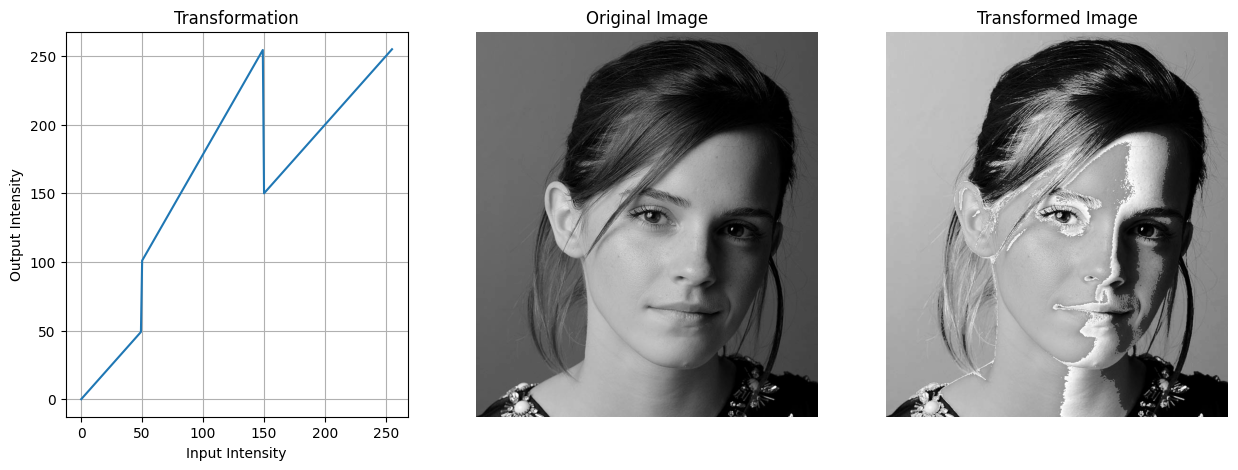

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


#  Creating the transformation function
t1 = np.arange(0, 50, 1)
t2 = np.arange(101, 256, 1.55)
t3 = np.arange(150, 256, 1)
T = np.concatenate((t1, t2, t3), axis=0)
#  Reading the image
img_original = cv.imread('emma.jpg',cv.IMREAD_GRAYSCALE)
#  Transforming the image
img_transformed =  cv.LUT(img_original, T)


#  Plotting the transformation
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].plot(T)
ax[0].set_title('Transformation')
ax[0].grid()
ax[0].set_xlabel('Input Intensity')
ax[0].set_ylabel('Output Intensity')

#  Plotting the original image
ax[1].imshow(img_original, cmap='gray')
ax[1].set_title('Original Image')
ax[1].axis('off')

#  Plotting the transformed image
ax[2].imshow(img_transformed, cmap='gray')
ax[2].set_title('Transformed Image')
ax[2].axis('off')

plt.show()


## Question 2

(0.0, 1.0, 0.0, 1.0)

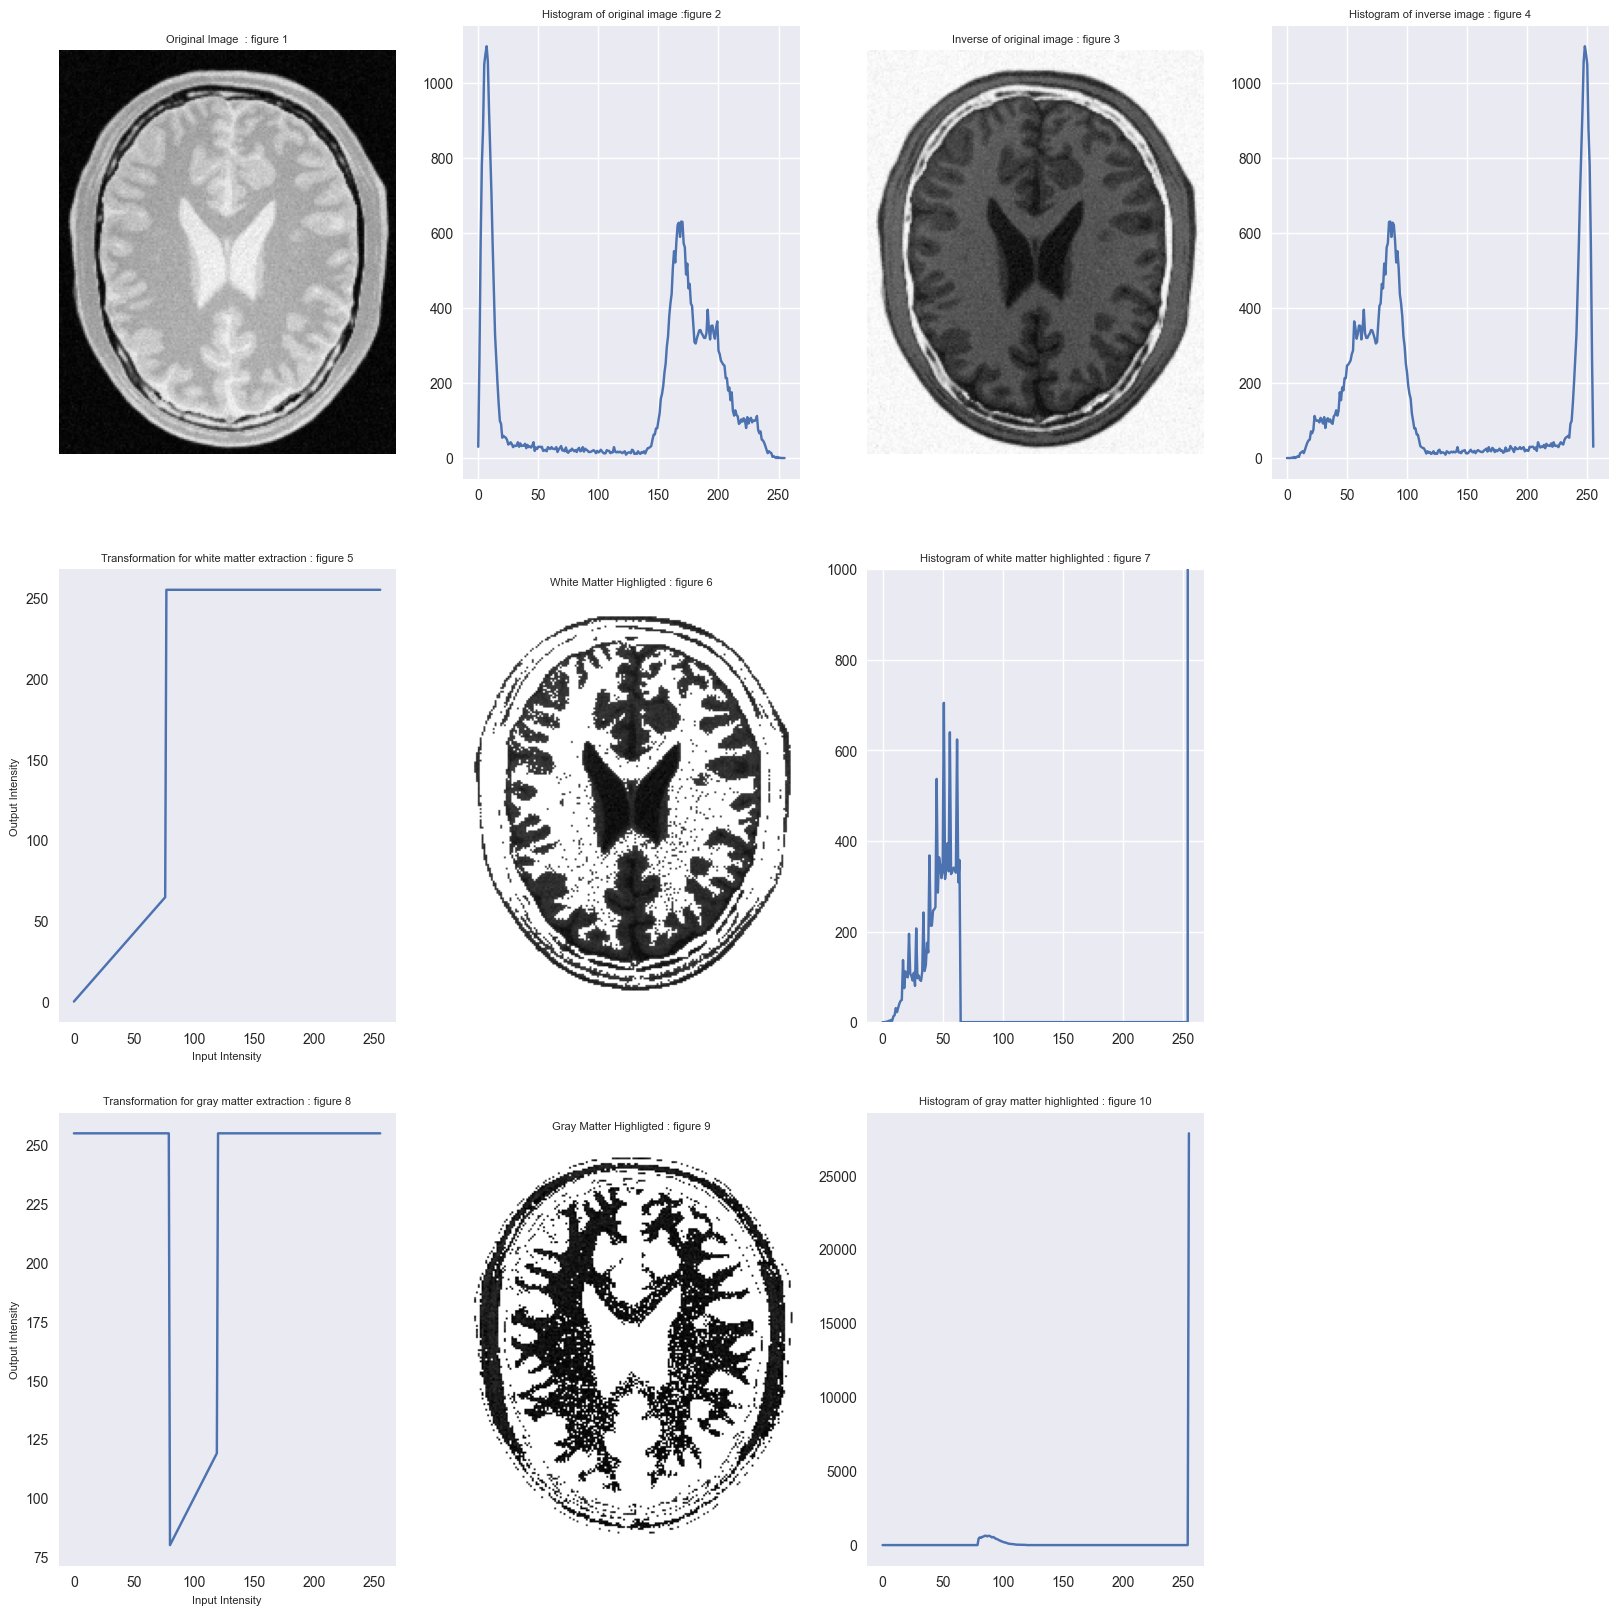

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image (replace 'brain_image.jpg' with your image filename)
img = cv2.imread('BrainProtonDensitySlice9.png', cv2.IMREAD_GRAYSCALE)

#plots
fig,ax = plt.subplots(3,4,figsize=(20,20))
ax[0,0].imshow(img,cmap='gray')
ax[0,0].set_title('Original Image  : figure 1',fontsize=8)
ax[0,0].axis('off')

# Analyze histogram to find the best threshold_white_matter value
hist = cv2.calcHist([img],[0],None,[256],[0,256])
ax[0,1].plot(hist)
ax[0,1].set_title('Histogram of original image :figure 2',fontsize=8)

#inverse of image
img1 = 255 - img
ax[0,2].imshow(img1,cmap='gray')
ax[0,2].set_title('Inverse of original image : figure 3',fontsize=8)
ax[0,2].axis('off')

# Analyze histogram to find intensity transformation
hist = cv2.calcHist([img1],[0],None,[256],[0,256])
ax[0,3].plot(hist)
ax[0,3].set_title('Histogram of inverse image : figure 4',fontsize=8)
#definiting a intenity transformation array to use cv.LUT
threshold_white_matter = 65
t1 = np.arange(0, threshold_white_matter, 0.85)
t2 = 255 - np.zeros(256 - len(t1))  
T = np.concatenate((t1, t2))

ax[1,0].plot(T)
ax[1,0].set_title('Transformation for white matter extraction : figure 5',fontsize=8) 
ax[1,0].grid()
ax[1,0].set_xlabel('Input Intensity',fontsize=8)
ax[1,0].set_ylabel('Output Intensity', fontsize=8)

#white matter highlighted image
img2 = cv2.LUT(img1,T).astype(np.uint8)
ax[1,1].imshow(img2,cmap='gray')
ax[1,1].set_title('White Matter Highligted : figure 6',fontsize=8) 
ax[1,1].axis('off')

# histogram of white matter highlighted image
hist = cv2.calcHist([img2],[0],None,[256],[0,256])
ax[1,2].plot(hist)
ax[1,2].set_title('Histogram of white matter highlighted : figure 7',fontsize=8)
#limit y axis to 0-1000
ax[1,2].set_ylim([0,1000])

#gray matter highlighted image
#piecewise linear transformation contains 3 parts , mid part is linear, left and right part is 255
threshold_gray_matter_start = 80
threshold_gray_matter_end = 120

t_mid = np.arange(threshold_gray_matter_start, threshold_gray_matter_end, 1)
t_left = 255-np.zeros(threshold_gray_matter_start)
t_right = 255 - np.zeros(256 - threshold_gray_matter_end)
T = np.concatenate((t_left, t_mid, t_right))

ax[2,0].plot(T)
ax[2,0].set_title('Transformation for gray matter extraction : figure 8',fontsize=8)
ax[2,0].grid()
ax[2,0].set_xlabel('Input Intensity',fontsize=8)
ax[2,0].set_ylabel('Output Intensity', fontsize=8)

img3 = cv2.LUT(img1,T).astype(np.uint8)
ax[2,1].imshow(img3,cmap='gray')
ax[2,1].set_title('Gray Matter Highligted : figure 9',fontsize=8)
ax[2,1].axis('off')

# histogram of gray matter highlighted image
hist = cv2.calcHist([img3],[0],None,[256],[0,256])
ax[2,2].plot(hist)
ax[2,2].set_title('Histogram of gray matter highlighted : figure 10',fontsize=8)
ax[2,2].grid()
ax[1,3].axis('off')
ax[2,3].axis('off')



# Question 3

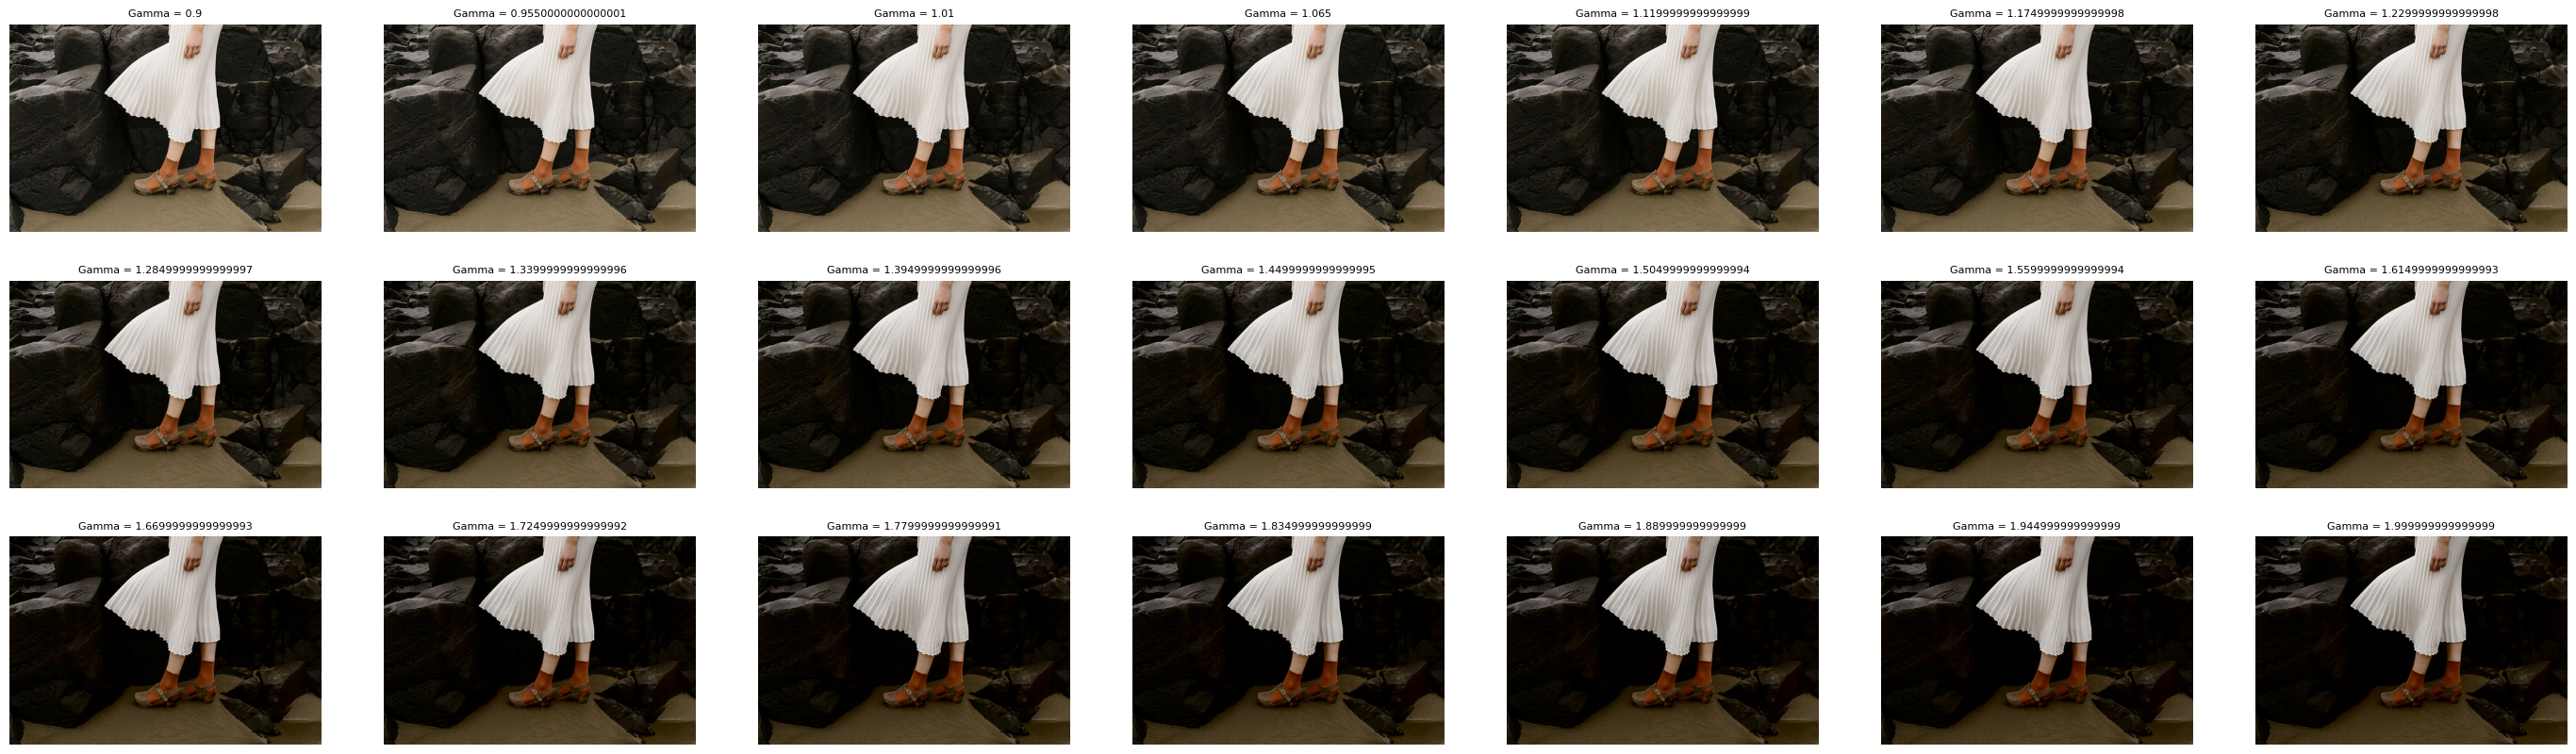

C:\Users\Dojitha Mirihagalla\AppData\Local\Temp\ipykernel_13568\3078897846.py:38: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


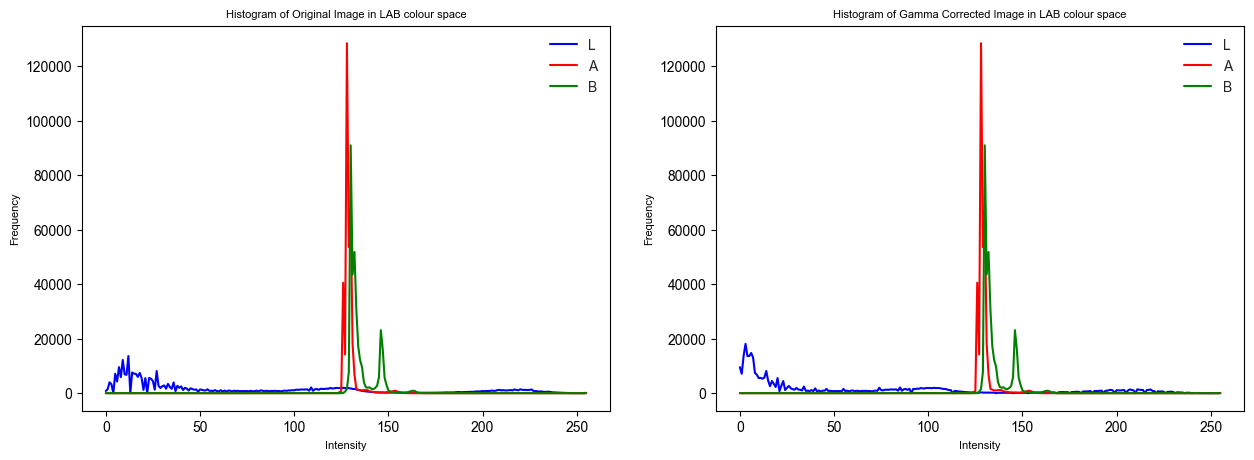

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# applying gamma correction to L plane of LAB color space

img_original = cv.imread("highlights_and_shadows.jpg",cv.IMREAD_COLOR)


# converting to LAB color space
img_Original_lab = cv.cvtColor(img_original, cv.COLOR_BGR2LAB)

# splitting the LAB image to different channels
l, a, b = cv.split(img_Original_lab)

fig, ax = plt.subplots(3, 7, figsize=(35, 10))
gamma = 0.9
for i in range(21):
    gamma_table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    l_gamma_corrected = cv.LUT(l, gamma_table)
    img_gamma_corrected = cv.merge([l_gamma_corrected, a, b])
    img_corrected = cv.cvtColor(img_gamma_corrected, cv.COLOR_LAB2RGB)
    ax[i//7, i%7].imshow(img_corrected)
    ax[i//7, i%7].set_title("Gamma = " + str(gamma), fontsize=8)
    ax[i//7, i%7].axis("off")
    gamma += 0.055

plt.show()


#Histogram Plots for Original Image and Gamma Corrected Image (assuming gamma = 1.28) in LAB color space
gamma = 1.28
gamma_table = np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
l_gamma_corrected_l = cv.LUT(l, gamma_table)
img_gamma_corrected_lab = cv.merge([l_gamma_corrected_l, a, b])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
plt.style.use('seaborn-darkgrid')
color = ('b','r','g')
for i,col in enumerate(color):
    histr = cv.calcHist([img_Original_lab],[i],None,[256],[0,256])
    ax[0].plot(histr,color = col)
    ax[0].set_title('Histogram of Original Image in LAB colour space',fontsize=8)
    ax[0].set_xlabel('Intensity',fontsize=8)
    ax[0].set_ylabel('Frequency',fontsize=8)
    ax[0].legend(('L','A','B'))
  
    histr = cv.calcHist([img_gamma_corrected_lab],[i],None,[256],[0,256])
    ax[1].plot(histr,color = col)
    ax[1].set_title('Histogram of Gamma Corrected Image in LAB colour space',fontsize=8)
    ax[1].set_xlabel('Intensity',fontsize=8)
    ax[1].set_ylabel('Frequency',fontsize=8)
    ax[1].legend(('L','A','B'))
plt.show()


# Question 4

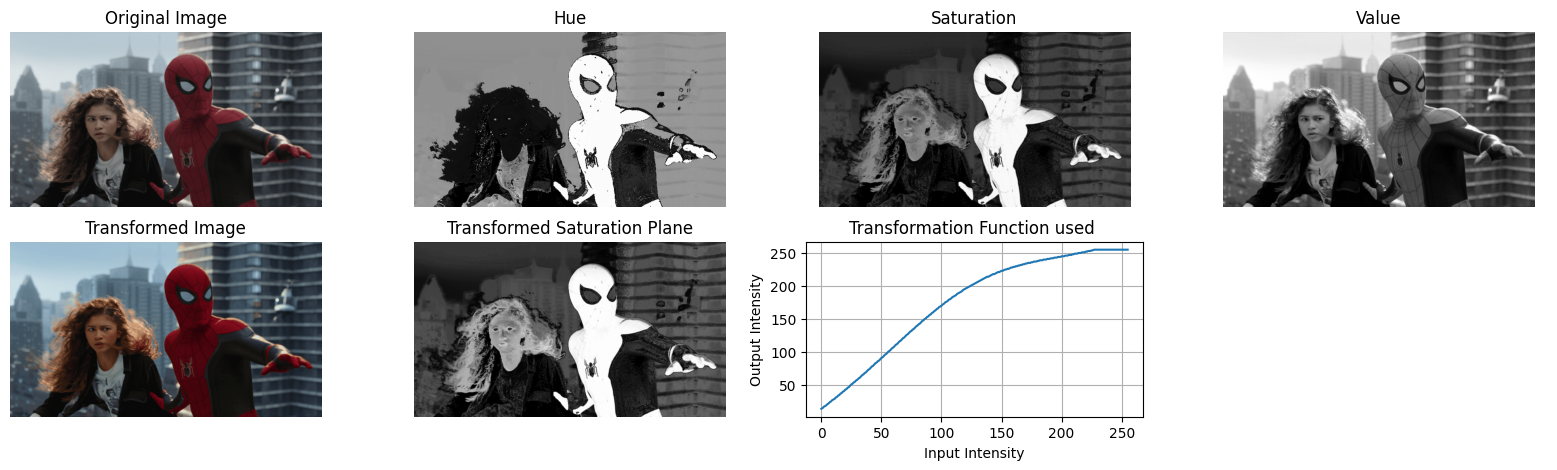

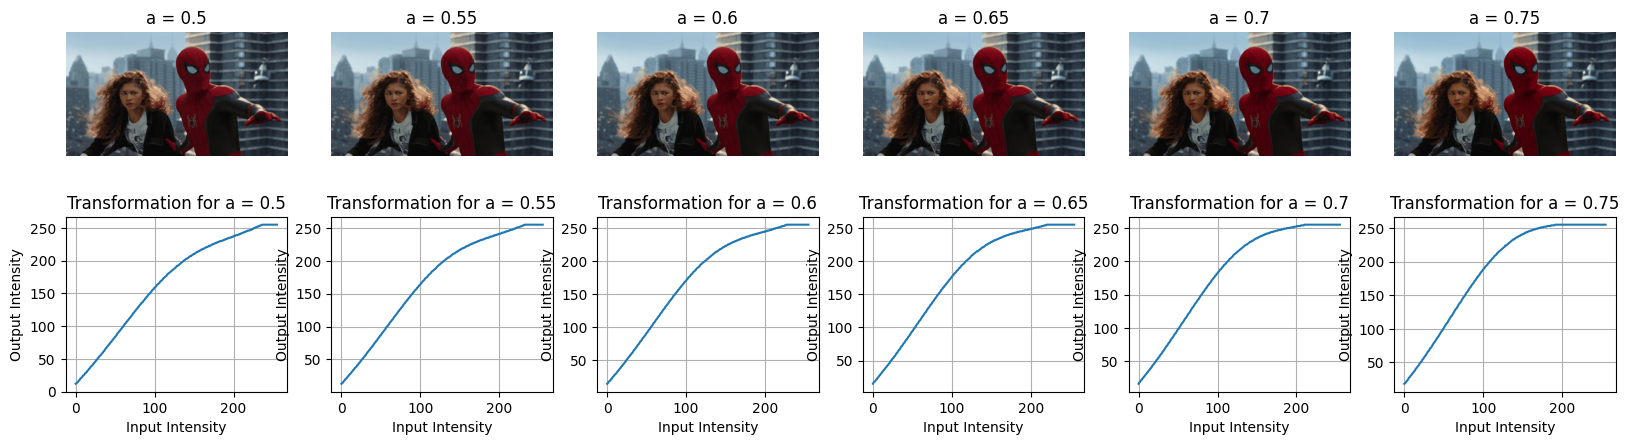

In [53]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

#define intensity transformation function
def f(x,a,sigma=70):
    f1 = x+a*128*np.exp(-(x-128)**2*(1/(sigma**2*2)))
    return min(f1,255)


image = cv2.imread('spider.png',cv2.IMREAD_COLOR)

# Convert the image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV image into separate channels
h, s, v = cv2.split(hsv_image)

hist = cv2.calcHist([s],[0],None,[256],[0,256])


# transformation
a=0.6
transformation = np.array([f(x,a) for x in range(256)]).astype(np.uint8)
s_new = cv.LUT(s,transformation)

hist = cv2.calcHist([s_new],[0],None,[256],[0,256])
hsv_image_new = cv2.merge([h,s_new,v])


fig,ax = plt.subplots(2,4,figsize=(20,5))
#original image
ax[0,0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')
#HSV planes
ax[0,1].imshow(h,cmap='gray')
ax[0,1].set_title('Hue')
ax[0,1].axis('off')

ax[0,2].imshow(s,cmap = 'gray')
ax[0,2].set_title('Saturation')
ax[0,2].axis('off')

ax[0,3].imshow(v,cmap = 'gray')
ax[0,3].set_title('Value')
ax[0,3].axis('off')

#transformed image
ax[1,0].imshow(cv.cvtColor(hsv_image_new, cv2.COLOR_HSV2RGB))
ax[1,0].set_title('Transformed Image')
ax[1,0].axis('off')

#transformed Saturation plane
ax[1,1].imshow(s_new,cmap = 'gray')
ax[1,1].set_title('Transformed Saturation Plane')
ax[1,1].axis('off')

#Transformation function
ax[1,2].plot(transformation)
ax[1,2].set_title('Transformation Function used ')
ax[1,2].grid()
ax[1,2].set_xlabel('Input Intensity')
ax[1,2].set_ylabel('Output Intensity')

ax[1,3].axis('off')
plt.show()


# plot Various a values and transformed images to select the best value of a
fig,ax = plt.subplots(2,6,figsize=(20,5))
a=0.5
for i in range(6):
    transformation = np.array([f(x,a) for x in range(256)]).astype(np.uint8)
    s_new = cv.LUT(s,transformation)
    hsv_image_new = cv2.merge([h,s_new,v])
    ax[0,i].imshow(cv.cvtColor(hsv_image_new, cv2.COLOR_HSV2RGB))
    ax[0,i].set_title('a = ' + str(round(a,4)))
    ax[0,i].axis('off')
    ax[1,i].plot(transformation)
    ax[1,i].set_title('Transformation for a = ' + str(round(a,4)))
    ax[1,i].grid()
    ax[1,i].set_xlabel('Input Intensity')
    ax[1,i].set_ylabel('Output Intensity')
    a+=0.05

a=1.3